<a href="https://colab.research.google.com/github/Bhavu2542000/TreeDecision/blob/main/DecisionTreeCodes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install graphviz

In [21]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn import tree

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline


In [5]:
data = '/content/winequality-red.csv'

df = pd.read_csv(data, header=None)

In [6]:
df.shape

(1600, 12)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6


In [8]:
col_names = ['fixedacidity','volatileacidity','citricacid','residualsugar','chlorides','freesulfurdioxide','totalsulfurdioxide','density','pH','sulphates','alcohol','quality']
df.columns = col_names
col_names

['fixedacidity',
 'volatileacidity',
 'citricacid',
 'residualsugar',
 'chlorides',
 'freesulfurdioxide',
 'totalsulfurdioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [9]:
df.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   fixedacidity        1600 non-null   object
 1   volatileacidity     1600 non-null   object
 2   citricacid          1600 non-null   object
 3   residualsugar       1600 non-null   object
 4   chlorides           1600 non-null   object
 5   freesulfurdioxide   1600 non-null   object
 6   totalsulfurdioxide  1600 non-null   object
 7   density             1600 non-null   object
 8   pH                  1600 non-null   object
 9   sulphates           1600 non-null   object
 10  alcohol             1600 non-null   object
 11  quality             1600 non-null   object
dtypes: object(12)
memory usage: 150.1+ KB


In [11]:
col_names = ['fixedacidity',	'volatileacidity',	'citricacid',	'residualsugar',	'chlorides',	'freesulfurdioxide',	'totalsulfurdioxide',	'density',	'pH',	'sulphates',	'alcohol',	'quality']


for col in col_names:

    print(df[col].value_counts())

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.8     1
13.4     1
4.7      1
4.6      1
5.5      1
Name: fixedacidity, Length: 97, dtype: int64
0.6      47
0.5      46
0.43     43
0.59     39
0.36     38
         ..
0.92      1
1.035     1
1.025     1
0.565     1
1.09      1
Name: volatileacidity, Length: 144, dtype: int64
0.0     132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.71      1
0.79      1
0.62      1
1.0       1
0.78      1
Name: citricacid, Length: 81, dtype: int64
2.0     156
2.2     131
1.8     129
2.1     128
1.9     117
       ... 
2.25      1
4.25      1
2.85      1
3.45      1
13.9      1
Name: residualsugar, Length: 92, dtype: int64
0.08                   66
0.07400000000000001    55
0.076                  51
0.078                  51
0.084                  49
                       ..
0.128                   1
0.213                   1
0.18600000000000003     1
0.34299999999999997     1
0.23                    1
Name: chloride

In [12]:
df['quality'].value_counts()

5          681
6          638
7          199
4           53
8           18
3           10
quality      1
Name: quality, dtype: int64

In [13]:
df.isnull().sum()

fixedacidity          0
volatileacidity       0
citricacid            0
residualsugar         0
chlorides             0
freesulfurdioxide     0
totalsulfurdioxide    0
density               0
pH                    0
sulphates             0
alcohol               0
quality               0
dtype: int64

In [14]:
X = df.drop(['quality'], axis=1)

y = df['quality']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [16]:
X_train.shape, X_test.shape

((1072, 11), (528, 11))

In [17]:
X_train.dtypes

fixedacidity          object
volatileacidity       object
citricacid            object
residualsugar         object
chlorides             object
freesulfurdioxide     object
totalsulfurdioxide    object
density               object
pH                    object
sulphates             object
alcohol               object
dtype: object

In [18]:
X_train.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol
820,9.1,0.66,0.15,3.2,0.09699999999999999,9.0,59.0,0.99976,3.28,0.54,9.6
567,8.7,0.7,0.24,2.5,0.226,5.0,15.0,0.9991,3.32,0.6,9.0
355,6.1,0.21,0.4,1.4,0.066,40.5,165.0,0.9912,3.25,0.59,11.9
1545,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.9955,3.17,0.81,11.2
209,7.8,0.44,0.28,2.7,0.1,18.0,95.0,0.9966,3.22,0.67,9.4


In [22]:
import category_encoders as ce

In [23]:
encoder = ce.OrdinalEncoder(cols= ['fixedacidity',	'volatileacidity',	'citricacid',	'residualsugar',	'chlorides',	'freesulfurdioxide',	'totalsulfurdioxide',	'density',	'pH',	'sulphates',	'alcohol'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [24]:
X_train.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol
820,1,1,1,1,1,1,1,1,1,1,1
567,2,2,2,2,2,2,2,2,2,2,2
355,3,3,3,3,3,3,3,3,3,3,3
1545,4,4,4,4,4,4,4,4,4,4,4
209,5,5,5,5,5,5,5,5,5,5,5


In [25]:
X_test.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol
526,54.0,7.0,2.0,10.0,46.0,18.0,114.0,132.0,29.0,5.0,16.0
354,-1.0,52.0,-1.0,50.0,108.0,36.0,47.0,-1.0,60.0,12.0,49.0
168,10.0,27.0,34.0,26.0,14.0,6.0,55.0,50.0,41.0,11.0,2.0
135,51.0,123.0,7.0,17.0,31.0,27.0,102.0,126.0,5.0,10.0,16.0
937,38.0,76.0,51.0,4.0,29.0,9.0,33.0,151.0,27.0,29.0,33.0


In [56]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [57]:
y_pred_gini = clf_gini.predict(X_test)

In [58]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.5057


In [59]:
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini

array(['5', '5', '5', ..., '5', '5', '6'], dtype=object)

In [60]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.5336


In [61]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.5336
Test set score: 0.5057


[Text(0.5, 0.875, 'x[10] <= 23.5\ngini = 0.649\nsamples = 1072\nvalue = [8, 38, 463, 411, 136, 15, 1]'),
 Text(0.25, 0.625, 'x[10] <= 6.5\ngini = 0.589\nsamples = 761\nvalue = [7, 28, 402, 270, 50, 4, 0]'),
 Text(0.125, 0.375, 'x[10] <= 4.5\ngini = 0.516\nsamples = 257\nvalue = [1, 11, 163, 72, 10, 0, 0]'),
 Text(0.0625, 0.125, 'gini = 0.663\nsamples = 93\nvalue = [1, 9, 40, 34, 9, 0, 0]'),
 Text(0.1875, 0.125, 'gini = 0.384\nsamples = 164\nvalue = [0, 2, 123, 38, 1, 0, 0]'),
 Text(0.375, 0.375, 'x[0] <= 51.5\ngini = 0.613\nsamples = 504\nvalue = [6, 17, 239, 198, 40, 4, 0]'),
 Text(0.3125, 0.125, 'gini = 0.589\nsamples = 427\nvalue = [5, 13, 218, 163, 25, 3, 0]'),
 Text(0.4375, 0.125, 'gini = 0.678\nsamples = 77\nvalue = [1, 4, 21, 35, 15, 1, 0]'),
 Text(0.75, 0.625, 'x[9] <= 1.5\ngini = 0.677\nsamples = 311\nvalue = [1, 10, 61, 141, 86, 11, 1]'),
 Text(0.625, 0.375, 'x[2] <= 19.5\ngini = 0.397\nsamples = 11\nvalue = [0, 0, 8, 3, 0, 0, 0]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples =

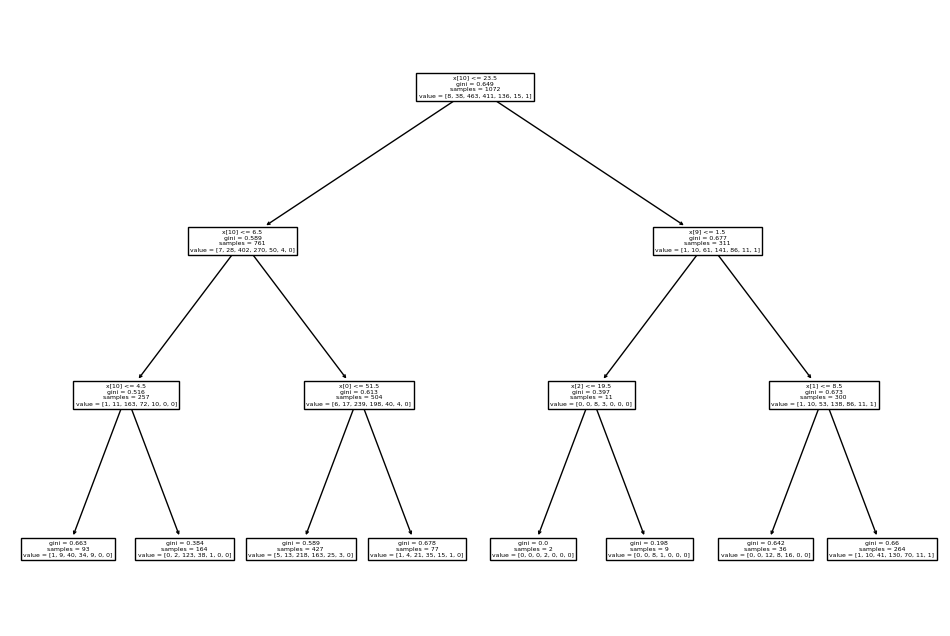

In [62]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train))

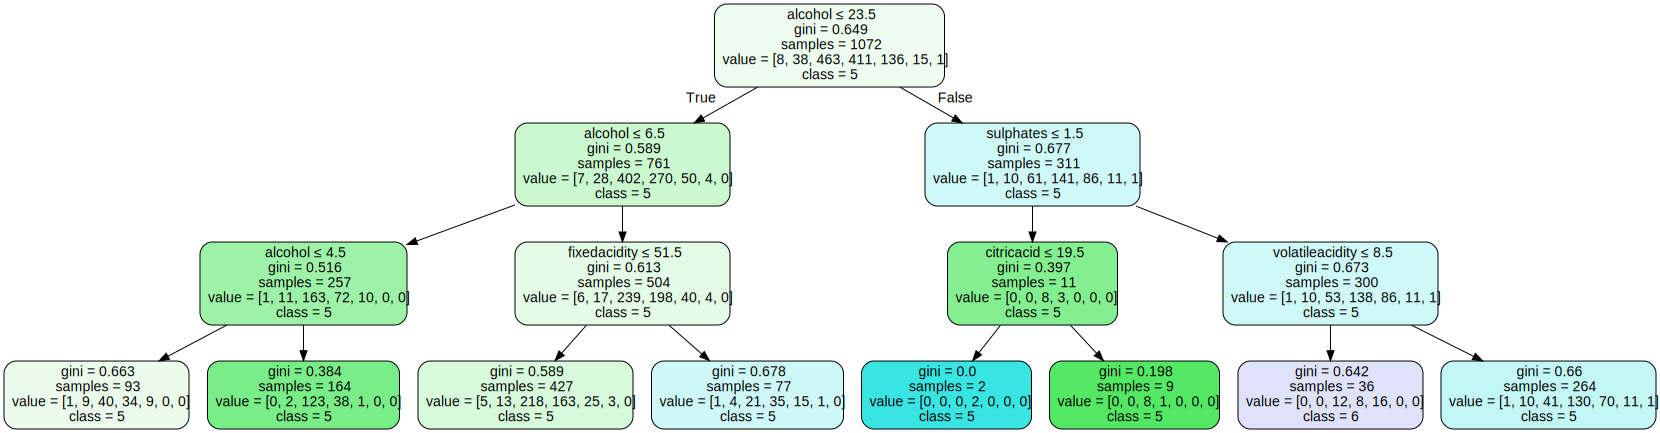

In [63]:
dot_data = tree.export_graphviz(clf_gini, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

In [37]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [38]:
y_pred_en = clf_en.predict(X_test)

In [39]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.5076


In [40]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['5', '5', '5', ..., '5', '5', '6'], dtype=object)

In [41]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.5252


In [42]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.5252
Test set score: 0.5076


[Text(0.5, 0.875, 'x[10] <= 23.5\nentropy = 1.75\nsamples = 1072\nvalue = [8, 38, 463, 411, 136, 15, 1]'),
 Text(0.25, 0.625, 'x[0] <= 52.5\nentropy = 1.552\nsamples = 761\nvalue = [7, 28, 402, 270, 50, 4, 0]'),
 Text(0.125, 0.375, 'x[1] <= 81.5\nentropy = 1.471\nsamples = 655\nvalue = [6, 22, 364, 229, 31, 3, 0]'),
 Text(0.0625, 0.125, 'entropy = 1.397\nsamples = 594\nvalue = [2, 15, 332, 215, 28, 2, 0]'),
 Text(0.1875, 0.125, 'entropy = 1.903\nsamples = 61\nvalue = [4, 7, 32, 14, 3, 1, 0]'),
 Text(0.375, 0.375, 'x[4] <= 87.5\nentropy = 1.867\nsamples = 106\nvalue = [1, 6, 38, 41, 19, 1, 0]'),
 Text(0.3125, 0.125, 'entropy = 1.755\nsamples = 93\nvalue = [0, 3, 32, 38, 19, 1, 0]'),
 Text(0.4375, 0.125, 'entropy = 1.776\nsamples = 13\nvalue = [1, 3, 6, 3, 0, 0, 0]'),
 Text(0.75, 0.625, 'x[7] <= 150.0\nentropy = 1.874\nsamples = 311\nvalue = [1, 10, 61, 141, 86, 11, 1]'),
 Text(0.625, 0.375, 'x[9] <= 8.5\nentropy = 1.964\nsamples = 167\nvalue = [0, 6, 36, 61, 53, 11, 0]'),
 Text(0.5625, 

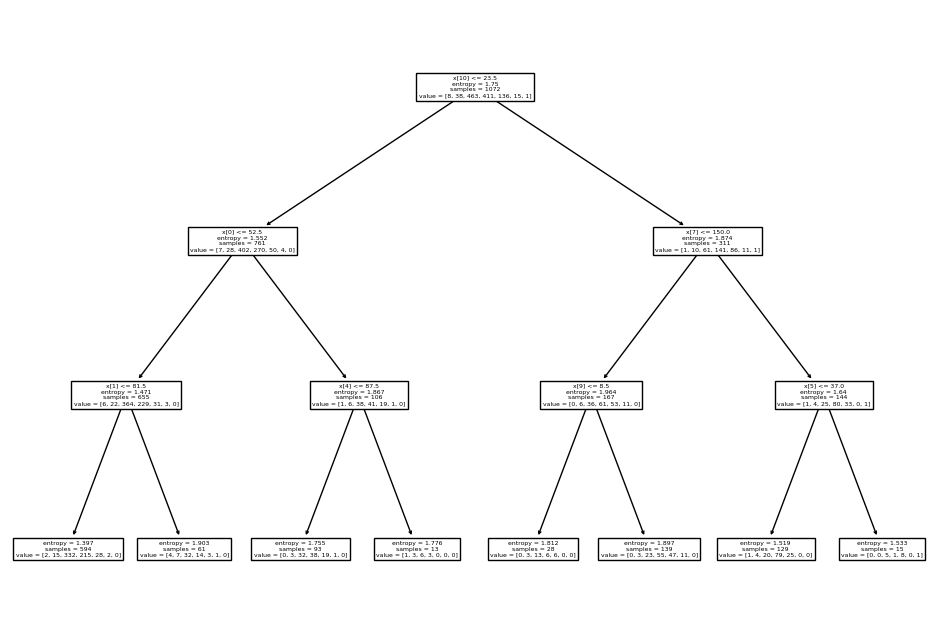

In [43]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train))

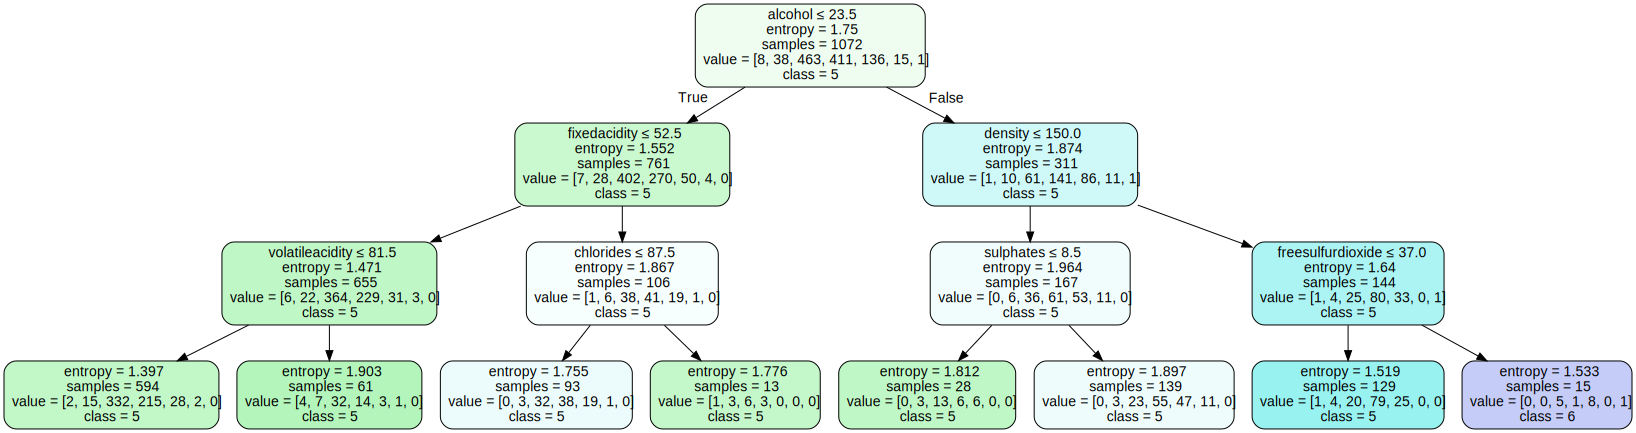

In [44]:
dot_data = tree.export_graphviz(clf_en, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

In [45]:
cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[  0   0   1   1   0   0]
 [  0   0  11   4   0   0]
 [  0   0 169  48   1   0]
 [  0   0 129  96   2   0]
 [  0   0  21  39   3   0]
 [  0   0   0   3   0   0]]


In [46]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        15
           5       0.51      0.78      0.62       218
           6       0.50      0.42      0.46       227
           7       0.50      0.05      0.09        63
           8       0.00      0.00      0.00         3

    accuracy                           0.51       528
   macro avg       0.25      0.21      0.19       528
weighted avg       0.49      0.51      0.46       528



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
